In [ ]:
!pip install stable-baselines gym-anytrading gym

     |████████████████████████████████| 240 kB 5.5 MB/s 
     |████████████████████████████████| 171 kB 38.1 MB/s 


In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0

     |████████████████████████████████| 411.5 MB 7.0 kB/s 
     |████████████████████████████████| 412.3 MB 29 kB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 3.8 MB 34.3 MB/s 
     |████████████████████████████████| 503 kB 58.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8b14917ff9451ab1d4e4baa4949aad803bdb6686b71ec741cef0afb341746a11
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing install

In [12]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/rldataframe.csv")
df.drop(columns=df.columns[0], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())
print(df.shape)

        Date  Open  High  Low  Close  Volume
0 2022-04-01   203   238  179    220  118075
1 2022-05-01   219   242  196    212  117591
2 2022-06-01   242   242  186    216  118054
3 2022-07-01   187   237  185    206  118730
4 2022-10-01   202   233  184    211  118508
(42, 6)


In [34]:
env=gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)

array([[195,   0],
       [194,  -1],
       [188,  -6],
       [205,  17],
       [183, -22],
       [197,  14],
       [218,  21],
       [237,  19],
       [237,   0],
       [158, -79],
       [184,  26],
       [213,  29],
       [184, -29],
       [174, -10],
       [200,  26],
       [215,  15],
       [281,  66],
       [278,  -3],
       [223, -55],
       [249,  26],
       [231, -18],
       [258,  27],
       [266,   8],
       [221, -45],
       [216,  -5],
       [231,  15],
       [187, -44],
       [195,   8],
       [245,  50],
       [227, -18],
       [158, -69],
       [182,  24],
       [206,  24],
       [158, -48],
       [183,  25],
       [202,  19],
       [134, -68]])

## Building random environment

info {'total_reward': -84.0, 'total_profit': 0.5713164798792707, 'position': 0}


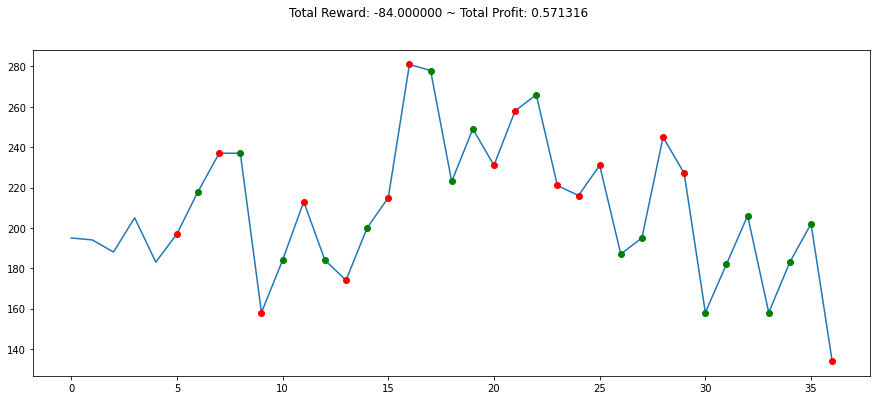

In [7]:
state=env.reset()
while True:
  action=env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done:
    print("info", info)
    break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

## Training

In [8]:
env_maker= lambda: gym.make('stocks-v0',df=df,frame_bound=(5,100),window_size=5)
env=DummyVecEnv([env_maker])

In [14]:
model=A2C('MlpLstmPolicy',env,verbose=1)
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.000312 |
| fps                | 20       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 376      |
---------------------------------
---------------------------------
| explained_variance | 0.000684 |
| fps                | 348      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 804      |
---------------------------------
---------------------------------
| explained_variance | 0.00426  |
| fps                | 345     

In [30]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.6803953608247423, 'position': 1}


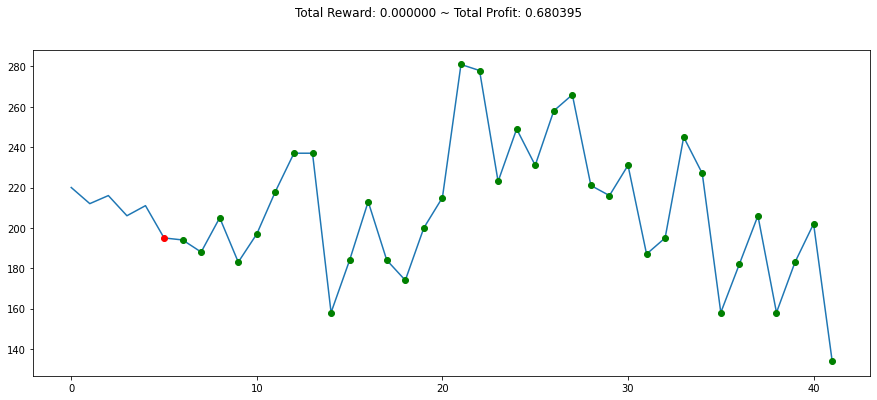

In [31]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()